In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('data.csv')
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4364,2014-05-07 00:00:00,500324.0,3.0,2.50,2280,2289,2.0,0,0,3,1880,400,2006,0,579 Alpine Ridge Pl NW,Issaquah,WA 98027,USA
312,2014-05-07 00:00:00,495000.0,4.0,2.75,2656,21195,2.0,0,0,3,2656,0,2014,0,31898 50th Pl S,Auburn,WA 98001,USA
2869,2014-06-19 00:00:00,540500.0,5.0,3.75,3090,7415,2.0,0,0,3,3090,0,2014,0,493 S 187th Ln,Burien,WA 98148,USA
879,2014-05-19 00:00:00,480000.0,4.0,3.50,3370,435600,2.0,0,3,3,3370,0,2005,0,44250 SE Edgewick Rd,North Bend,WA 98045,USA
3411,2014-06-26 00:00:00,302000.0,4.0,1.75,1530,17664,1.5,0,0,3,1530,0,1968,1997,16411 139th Pl SE,Renton,WA 98058,USA
1611,2014-05-30 00:00:00,415000.0,2.0,1.75,1340,4664,1.0,0,0,3,1340,0,2004,2003,13283 228th Pl NE,Redmond,WA 98053,USA
3840,2014-07-02 00:00:00,720000.0,4.0,3.00,3550,12327,1.5,0,0,4,2180,1370,1990,0,17325 102nd Ave NE,Bothell,WA 98011,USA
1191,2014-05-22 00:00:00,398000.0,2.0,1.00,590,10945,1.5,0,0,3,590,0,1983,2009,29613-29615 232nd Ave SE,Black Diamond,WA 98010,USA
975,2014-05-20 00:00:00,452000.0,4.0,1.00,1210,3760,1.5,0,0,3,1210,0,1900,2005,1106 N 80th St,Seattle,WA 98103,USA
2108,2014-06-09 00:00:00,1350000.0,4.0,3.25,3300,15907,2.0,0,0,5,3300,0,1985,0,9213 SE 68th St,Mercer Island,WA 98040,USA


In [37]:
date_time_cols = df['date']
date_time_cols = list(date_time_cols)

date = []
year = []
month = []
day = []

for i in date_time_cols:
    i = i.split(' ')     # split datetime
    d = i[0]             # take date part only
    date.append(d)

    j = d.split('-')     # split date
    year.append(j[0])
    month.append(j[1])
    day.append(j[2])

df.drop(columns=['date'], inplace=True)

df['year'] = year
df['month'] = month
df['day'] = day

In [38]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

In [39]:
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,day
3658,243000.0,2.0,1.50,1068,1758,2.0,0,0,3,1068,0,1990,2009,7231 NE 171st Ln,Kenmore,WA 98028,USA,2014,6,30
3732,695000.0,3.0,2.50,2620,51354,2.0,0,0,3,2620,0,1998,2006,23337 NE 138th Way,Woodinville,WA 98077,USA,2014,7,1
2302,290000.0,3.0,1.75,1520,15090,1.0,0,0,4,1520,0,1968,0,28515 SE 228th St,Maple Valley,WA 98038,USA,2014,6,11
96,670000.0,3.0,2.50,1680,2000,3.0,0,0,3,1680,0,1909,1998,3503 NE 44th St,Seattle,WA 98105,USA,2014,5,5
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,2014,5,2
1420,495000.0,3.0,2.50,1750,1548,3.0,0,0,3,1750,0,2013,1923,3933 S Brandon St,Seattle,WA 98118,USA,2014,5,27
2891,499000.0,3.0,1.75,1840,5000,1.0,0,0,4,920,920,1910,0,7043 Mary Ave NW,Seattle,WA 98117,USA,2014,6,19
1853,135000.0,1.0,1.00,790,13062,1.0,0,0,3,790,0,1942,1999,1641 S 124th St,Seattle,WA 98168,USA,2014,6,4
3150,403500.0,3.0,1.00,1830,8004,1.0,0,0,3,1200,630,1960,2012,13337 30th Ave NE,Seattle,WA 98125,USA,2014,6,23
3578,710000.0,2.0,1.50,1640,4080,1.5,0,0,5,1540,100,1916,0,4532 Latona Ave NE,Seattle,WA 98105,USA,2014,6,27


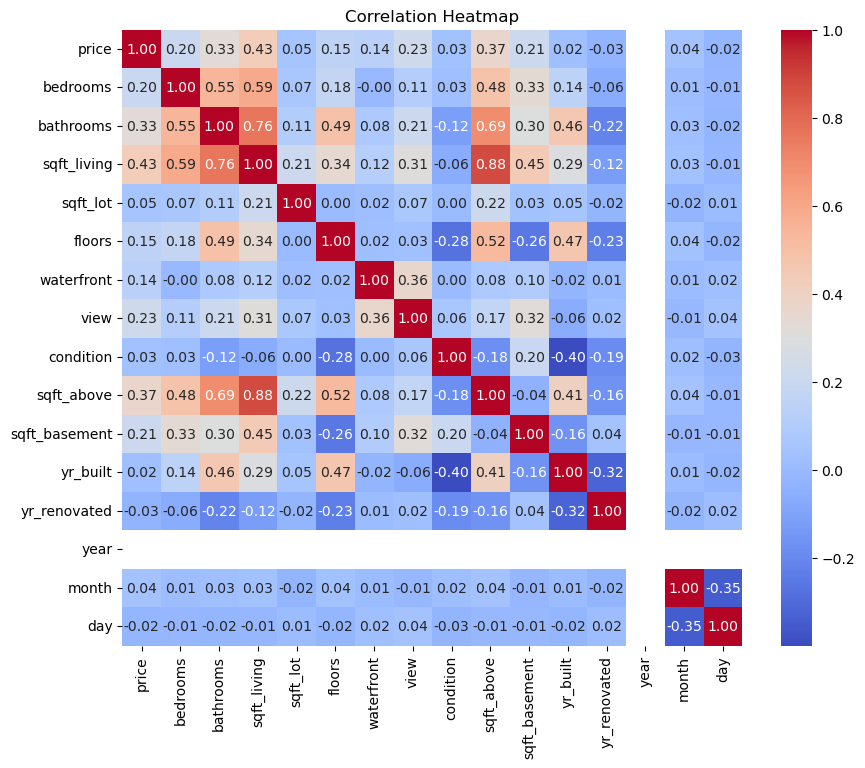

In [40]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df.drop(df[df['price'] == 0].index, inplace=True)
df.drop(df[df['bedrooms'] == 0].index, inplace=True)
df.drop(columns = ['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'street', 'statezip', 'country'], axis= 1, inplace= True)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,year,month,day
4424,178650.0,3.0,1.50,1430,1.0,0,0,1430,0,Burien,2014,5,28
1816,285000.0,3.0,1.75,2880,1.0,0,0,1580,1300,Tukwila,2014,6,3
3046,350000.0,7.0,3.00,2800,1.0,0,2,1400,1400,Renton,2014,6,23
30,382500.0,4.0,1.75,1560,1.0,0,0,1560,0,Kirkland,2014,5,2
3177,819000.0,3.0,3.50,2130,2.0,0,2,1530,600,Seattle,2014,6,24
1849,865000.0,3.0,1.75,2090,2.0,0,0,1610,480,Seattle,2014,6,4
3233,305000.0,4.0,2.25,2210,2.0,0,0,2210,0,Kent,2014,6,24
2976,869000.0,4.0,3.00,3740,2.0,0,0,3060,680,Woodinville,2014,6,20
1966,250000.0,3.0,2.50,1510,1.0,0,0,1030,480,Woodinville,2014,6,5
89,232000.0,2.0,1.00,1200,1.0,0,0,1200,0,Des Moines,2014,5,5


In [8]:
df = pd.get_dummies(df, columns=['city'], drop_first=True)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,year,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
1935,875000.000000,3.0,3.50,3250,2.0,0,0,2500,750,2014,...,False,True,False,False,False,False,False,False,False,False
1702,955000.000000,3.0,2.25,3020,2.0,0,0,2720,300,2014,...,False,False,False,False,False,False,False,False,False,False
1343,399000.000000,4.0,2.50,2870,2.0,0,0,2540,330,2014,...,False,False,False,False,False,False,False,False,False,False
4469,417985.714286,4.0,2.25,2070,2.0,0,0,2070,0,2014,...,False,False,False,False,False,False,False,False,False,False
2768,230000.000000,2.0,1.00,1080,1.0,0,0,1080,0,2014,...,False,False,False,False,False,False,False,False,False,False
3817,659000.000000,4.0,2.00,2090,1.0,0,0,2090,0,2014,...,False,False,False,False,False,False,False,False,False,False
4250,486000.000000,4.0,2.50,3560,2.0,0,0,3560,0,2014,...,False,False,False,False,False,False,False,False,False,False
4434,484991.666667,4.0,2.75,2320,2.0,0,0,2320,0,2014,...,False,False,False,False,False,False,False,False,False,False
2252,360000.000000,4.0,2.00,1630,1.0,0,0,1630,0,2014,...,False,False,False,False,False,False,False,False,True,False
2450,810000.000000,3.0,1.75,1980,1.0,0,2,1320,660,2014,...,False,False,False,False,False,False,False,False,False,False


In [9]:
for i in df.columns: 
    if df[i].dtype == 'bool': 
        df[i] = df[i].astype('int') 
    else: 
        continue
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,year,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
2256,199500.000000,3.0,1.00,920,1.0,0,0,920,0,2014,...,0,0,0,0,0,0,0,0,0,0
883,285000.000000,1.0,1.50,810,2.0,0,0,810,0,2014,...,0,0,0,0,0,0,0,0,0,0
3135,750000.000000,3.0,2.00,1820,1.5,0,0,1720,100,2014,...,0,1,0,0,0,0,0,0,0,0
388,985000.000000,4.0,2.25,4230,2.0,0,0,4230,0,2014,...,0,0,0,0,0,0,0,0,1,0
3744,425000.000000,3.0,1.50,1300,1.0,0,0,1300,0,2014,...,0,0,0,0,0,0,0,0,0,0
2715,430000.000000,3.0,1.00,980,1.0,0,0,980,0,2014,...,0,1,0,0,0,0,0,0,0,0
4252,734950.000000,4.0,3.25,4280,2.0,0,0,3050,1230,2014,...,0,0,0,0,0,0,0,0,0,0
2464,345000.000000,2.0,1.50,1800,1.0,0,0,1240,560,2014,...,0,0,0,0,0,0,0,0,0,0
3494,270000.000000,2.0,1.00,1780,1.0,0,3,1780,0,2014,...,0,0,0,0,0,0,0,0,0,0
4482,387884.615385,3.0,1.75,1590,1.5,0,0,970,620,2014,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df.drop(columns= ['price'], axis= 1) 
y = df['price']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train[['sqft_living', 'sqft_above', 'sqft_basement', 'year', 'month', 'day']] = scaler.fit_transform(
    X_train[['sqft_living', 'sqft_above', 'sqft_basement', 'year', 'month', 'day']]
)
X_test[['sqft_living', 'sqft_above', 'sqft_basement', 'year', 'month', 'day']] = scaler.transform(
    X_test[['sqft_living', 'sqft_above', 'sqft_basement', 'year', 'month', 'day']]
)

In [13]:
X_test.sample(10)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,year,month,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
309,5.0,4.50,2.306001,2.0,0,0,1.894107,1.225181,0.0,-1.123662,...,0,0,0,0,0,0,0,0,0,0
1321,3.0,1.50,-0.461009,1.0,0,0,-0.798897,0.525817,0.0,-1.123662,...,0,0,0,0,0,0,0,0,0,0
1210,3.0,1.50,-0.814929,3.0,0,0,-0.536746,-0.676215,0.0,-1.123662,...,0,1,0,0,0,0,0,0,0,0
3301,4.0,2.00,-0.107089,1.5,0,0,0.249706,-0.676215,0.0,0.343509,...,0,0,0,0,0,0,0,0,0,0
1187,4.0,2.50,1.201342,1.0,0,0,0.059051,2.339793,0.0,-1.123662,...,0,0,0,0,0,0,0,0,0,0
4154,3.0,2.75,0.761623,2.0,0,0,1.214898,-0.676215,0.0,1.810680,...,0,0,0,0,0,0,0,0,0,0
170,6.0,3.00,1.448014,1.5,0,0,1.977518,-0.676215,0.0,-1.123662,...,0,0,0,0,0,0,0,0,0,0
2868,4.0,2.25,0.268280,1.0,0,2,-0.441418,1.356312,0.0,0.343509,...,0,1,0,0,0,0,0,0,0,0
84,4.0,3.00,0.236106,1.0,0,0,-0.560578,1.509298,0.0,-1.123662,...,0,0,0,0,0,0,0,0,0,0
1769,3.0,2.25,1.801933,1.0,0,0,1.810695,0.350976,0.0,0.343509,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [53]:
from xgboost import XGBRegressor
model =  XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=1,
    reg_lambda=2,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
result = pd.DataFrame({
    "Real": y_test_log, "Predicted": y_pred_log
})
result.sample(10)

,Real,Predicted
1222,12.691584,13.028460
3028,13.604791,13.613346
135,13.329379,13.353219
811,13.681980,13.285632
2585,12.072547,12.184588
3903,13.604791,13.170532
2329,11.608245,12.674821
1972,13.053015,12.864298
1207,12.679200,12.978870
1197,12.847929,13.012348


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_log, y_pred_log)
mse = mean_squared_error(y_test_log, y_pred_log)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_log, y_pred_log)

print(f"\n📊 {model} EVALUATION")
print("-" * 40)
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


📊 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=-1, num_parallel_tree=None, ...) EVALUATION
----------------------------------------
MAE  : 0.2032
MSE  : 0.0871
RMSE : 0.2951
R²   : 0.7145


In [55]:
print("Training Score:", model.score(X_train, y_train_log)) 
print("Testing Score:", model.score(X_test, y_test_log))

Training Score: 0.8227605863861517
Testing Score: 0.7144810394303563


In [56]:
import joblib
joblib.dump(model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']